# Earthquake Mapping Over Last 116 Years

Keenan Zucker and James Jang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

quakes = pd.read_csv("./data/query1.csv")
quakes2 = pd.read_csv("./data/data.csv")


In [2]:
def get_marker_color(magnitude):
    if magnitude < 4.0:
        return ('wo') # minor
    elif magnitude < 5.0:
        return ('go') # light
    elif magnitude < 5.0:
        return ('yo') # moderate
    elif magnitude < 6.0:
        return ('mo') # strong
    elif magnitude < 7.0:
        return ('ro') # major
    else:
        return ('ko') # great
    

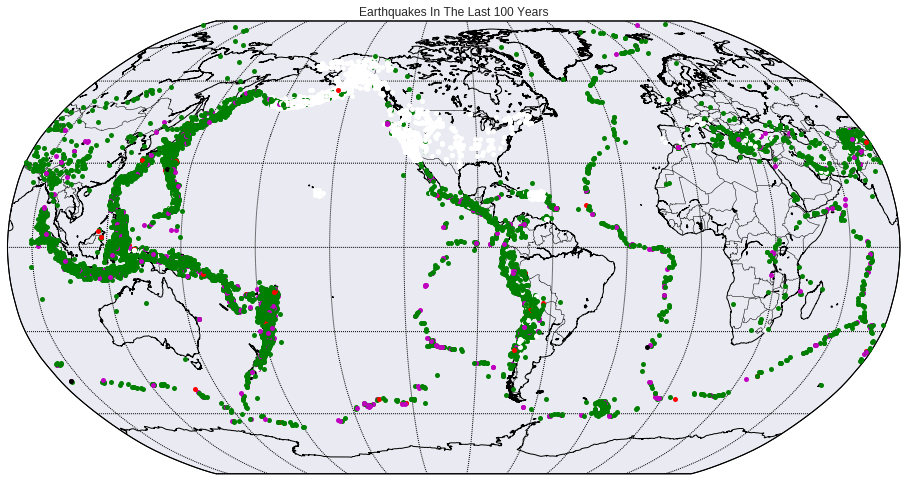

In [6]:
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
# depths = np.array(quakes.depth)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color(mag)
    my_map.plot(x, y, marker_string, markersize=5)
    
plt.title('Earthquakes In The Last 100 Years')
plt.show()

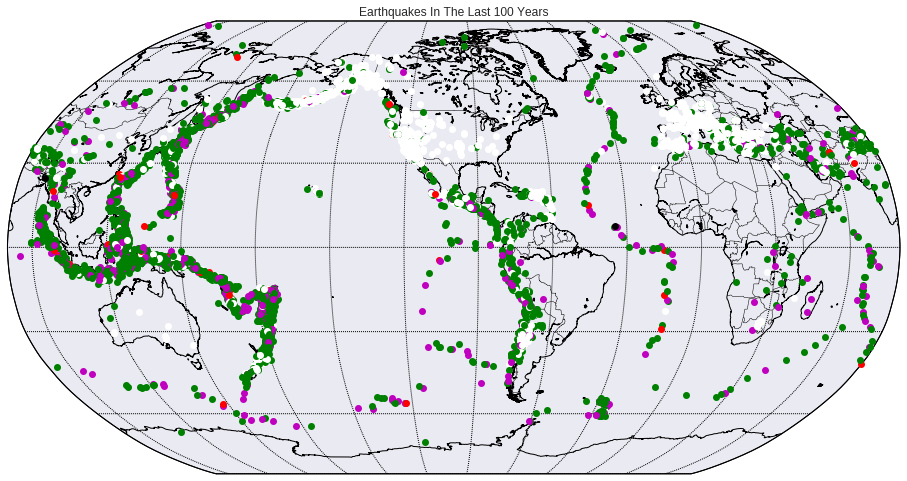

In [3]:
from mpl_toolkits.basemap import Basemap

quakes2 = pd.read_csv("./data/data.csv")
quakes2 = quakes2.sample(frac=0.01)
plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes2.latitude)
longs = np.array(quakes2.longitude)
mags = np.array(quakes2.mag)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color(mag)
    my_map.plot(x, y, marker_string, markersize=7)
    
plt.title('Earthquakes In The Last 100 Years')
plt.show()